# Feature Scaling: Standardization

`Standardization` is a feature scaling technique that transforms numerical features so that they have a **mean of 0**
and a **standard deviation of 1**. This ensures that all features are on a comparable scale while preserving the 
shape of their original distribution.

Standardization is also known as **Z-score normalization**.

---

## Why Standardization is Important

Standardization is important because many machine learning algorithms:
- Are sensitive to feature scale  
- Use distance calculations  
- Rely on gradient-based optimization  

Without standardization, features with larger magnitudes can dominate the learning process.

---

## Standardization Formula

Each value \( x \) is transformed using:

$$
x' = \frac{x - \mu}{\sigma}
$$

Where:
- $(\mu)$ = mean of the feature  
- $(\sigma)$ = standard deviation of the feature  

After transformation:
- Mean ≈ 0  
- Standard deviation ≈ 1  

---

## When to Use Standardization

Standardization is recommended when using:
- Linear Regression (with Gradient Descent)  
- Logistic Regression  
- Support Vector Machines (SVM)  
- k-Nearest Neighbors (k-NN)  
- Principal Component Analysis (PCA)  
- Neural Networks  

---

## When Standardization is Not Required

Standardization is usually not required for:
- Tree-based models (Decision Trees, Random Forests, XGBoost)  
- Rule-based models  

These models are not affected by feature scale.



In [ ]:
%%capture
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X=df.drop('Purchased',axis=1)
y=df['Purchased']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
X_train.shape,X_test.shape

((320, 2), (80, 2))

In [7]:
from sklearn.preprocessing import StandardScaler  
scaler=StandardScaler()

In [8]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [9]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_train_scaled,X_test_scaled

(          Age  EstimatedSalary
 0   -1.066752        -0.386344
 1    0.797535        -1.229939
 2    0.110692         1.853544
 3    0.601294        -0.909955
 4    1.876859        -1.288118
 ..        ...              ...
 315 -1.361114        -1.259028
 316 -1.164873        -1.026312
 317  0.503174         1.824455
 318  0.110692         0.195445
 319 -0.576151         0.457250
 
 [320 rows x 2 columns],
          Age  EstimatedSalary
 0   0.797535        -1.404475
 1   2.073100         0.515429
 2  -0.968632        -0.764507
 3   0.993775         0.748145
 4  -0.870512        -1.229939
 ..       ...              ...
 75 -0.281789        -0.589971
 76  1.778738         1.824455
 77  1.582498        -1.288118
 78 -0.281789        -0.677239
 79 -0.085549         0.224534
 
 [80 rows x 2 columns])

In [10]:
np.round(X_train_scaled.describe(),1)


,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


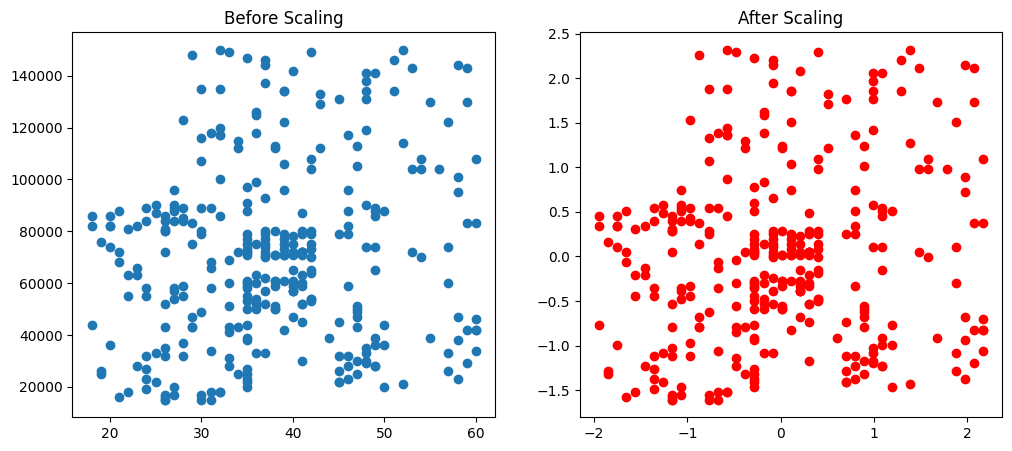

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
lr_scaled = LogisticRegression(max_iter=1000)
lr_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [17]:
print("Accuracy (Scaled):", accuracy_score(y_test, y_pred_scaled))

Accuracy (Scaled): 0.8625
